In [1]:
# import all the required librabies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(categories=[['I','M','F']])
df1=ord_enc.fit_transform(df[['Sex']])
df1

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [2.],
       [1.]])

In [7]:
df['Sex']=df1
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
from scipy.stats import skew
df.skew()

Sex               0.014980
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

0.014974722090408536
-0.6396434615451078
-0.6089793517180232
3.127693679207538
0.5307678720133928
0.7188396611678955
0.5916395905344537
0.6207038222275745
1.1137017739656028


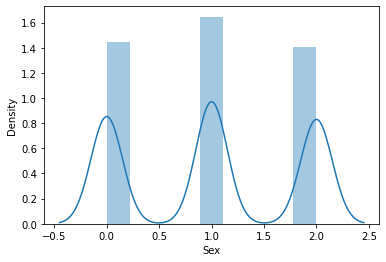

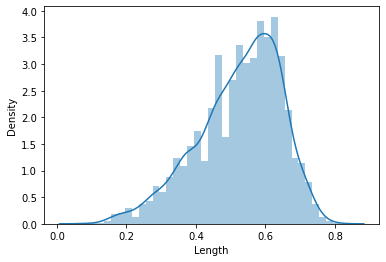

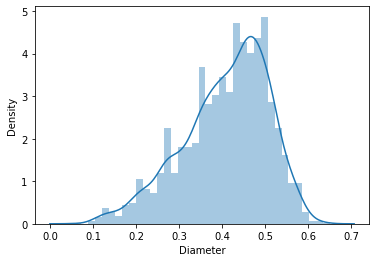

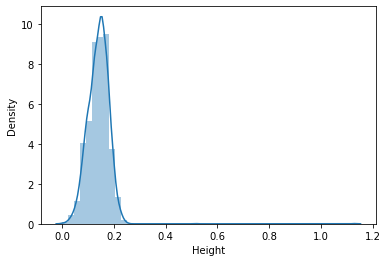

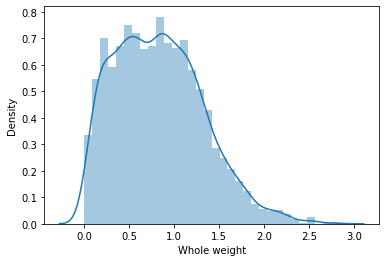

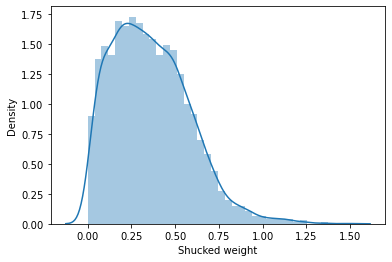

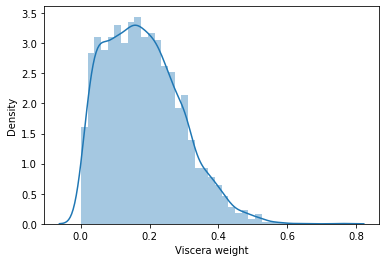

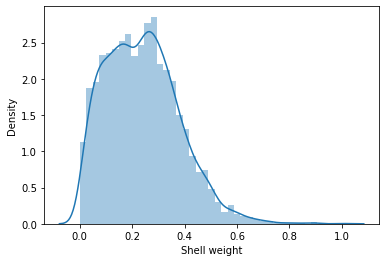

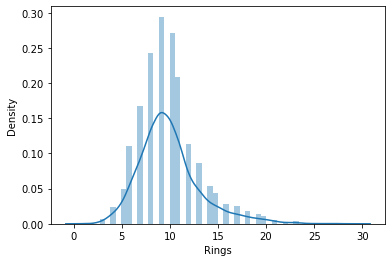

In [9]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [10]:
z_score=zscore(df[['Length','Diameter','Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4084 non-null   float64
 1   Length          4084 non-null   float64
 2   Diameter        4084 non-null   float64
 3   Height          4084 non-null   float64
 4   Whole weight    4084 non-null   float64
 5   Shucked weight  4084 non-null   float64
 6   Viscera weight  4084 non-null   float64
 7   Shell weight    4084 non-null   float64
 8   Rings           4084 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 319.1 KB


In [12]:
df.skew()

Sex               0.021071
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

0.021063153108848605
-0.6335530357553206
-0.6052273525549002
-0.2471012361244269
0.32376697427686923
0.44940831970770595
0.42977456978835943
0.35838000704463574
1.135949696170358


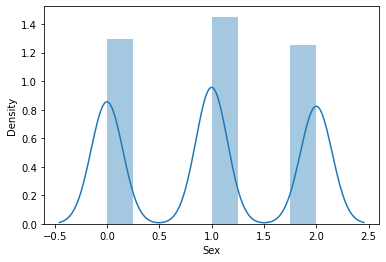

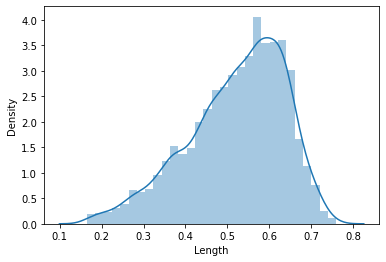

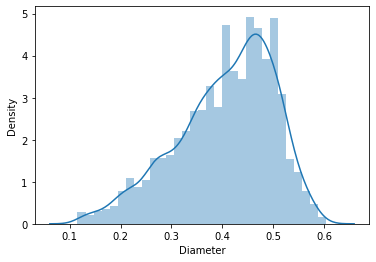

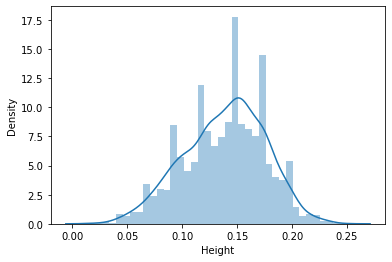

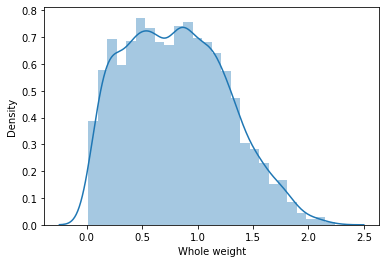

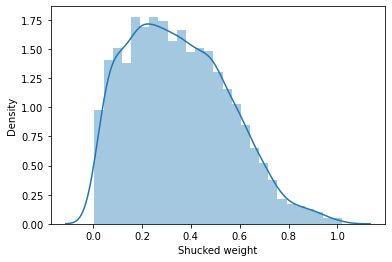

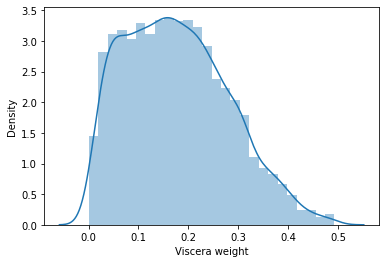

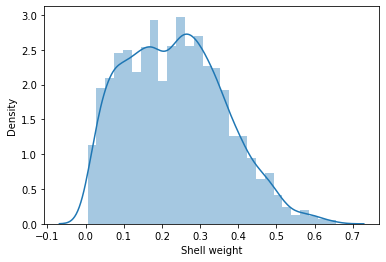

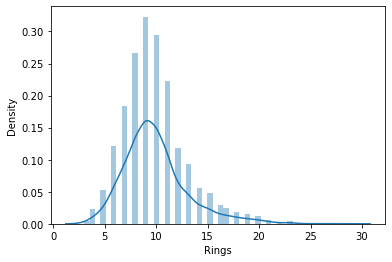

In [13]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [14]:
data_loss=(4177-4088)/4177*100
data_loss

2.1307158247546085

In [15]:
df_corr=df.corr().abs()
df_corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.501745,0.514629,0.510198,0.513865,0.473057,0.515797,0.510892,0.396293
Length,0.501745,1.000000,0.985902,0.894374,0.934127,0.908711,0.907570,0.911001,0.541905
Diameter,0.514629,0.985902,1.000000,0.901033,0.934226,0.903699,0.904090,0.918870,0.561048
Height,0.510198,0.894374,0.901033,1.000000,0.891581,0.839927,0.867448,0.898113,0.597622
Whole weight,0.513865,0.934127,0.934226,0.891581,1.000000,0.969115,0.965893,0.959393,0.533165
Shucked weight,0.473057,0.908711,0.903699,0.839927,0.969115,1.000000,0.929491,0.889464,0.413036
Viscera weight,0.515797,0.907570,0.904090,0.867448,0.965893,0.929491,1.000000,0.914894,0.497026
Shell weight,0.510892,0.911001,0.918870,0.898113,0.959393,0.889464,0.914894,1.000000,0.618991
Rings,0.396293,0.541905,0.561048,0.597622,0.533165,0.413036,0.497026,0.618991,1.000000


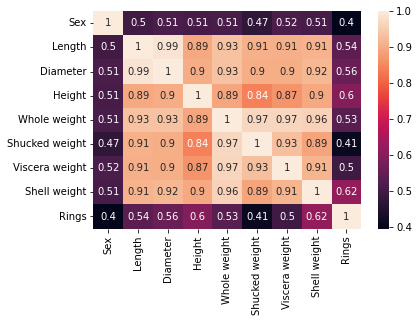

In [16]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [17]:
X=df.drop(columns="Rings")
Y=df["Rings"]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.416016,Sex
1,38.766761,Length
2,40.513206,Diameter
3,6.547268,Height
4,104.950042,Whole weight
5,27.493110,Shucked weight
6,16.750428,Viscera weight
7,22.991953,Shell weight


In [18]:
df=df.drop(["Whole weight"],axis=1)

In [19]:
X=df.drop(columns="Rings")
Y=df["Rings"]

In [20]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.413189,Sex
1,38.766281,Length
2,40.509379,Diameter
3,6.542953,Height
4,9.088160,Shucked weight
5,10.764923,Viscera weight
6,9.660229,Shell weight


In [21]:
df=df.drop(["Length"],axis=1)
X=df.drop(columns="Rings")
Y=df["Rings"]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.407502,Sex
1,9.995839,Diameter
2,6.525648,Height
3,8.904380,Shucked weight
4,10.633625,Viscera weight
5,9.621787,Shell weight


In [22]:
df_corr=df.corr().abs()
df_corr

,Sex,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.514629,0.510198,0.473057,0.515797,0.510892,0.396293
Diameter,0.514629,1.000000,0.901033,0.903699,0.904090,0.918870,0.561048
Height,0.510198,0.901033,1.000000,0.839927,0.867448,0.898113,0.597622
Shucked weight,0.473057,0.903699,0.839927,1.000000,0.929491,0.889464,0.413036
Viscera weight,0.515797,0.904090,0.867448,0.929491,1.000000,0.914894,0.497026
Shell weight,0.510892,0.918870,0.898113,0.889464,0.914894,1.000000,0.618991
Rings,0.396293,0.561048,0.597622,0.413036,0.497026,0.618991,1.000000


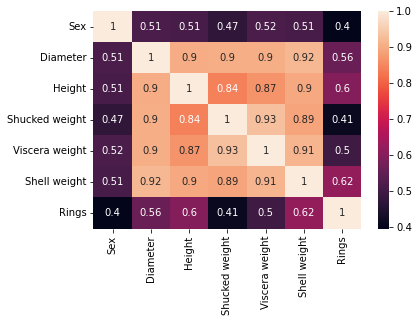

In [23]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [24]:
df

,Sex,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.365,0.095,0.2245,0.1010,0.1500,15
1,1.0,0.265,0.090,0.0995,0.0485,0.0700,7
2,2.0,0.420,0.135,0.2565,0.1415,0.2100,9
3,1.0,0.365,0.125,0.2155,0.1140,0.1550,10
4,0.0,0.255,0.080,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,2.0,0.450,0.165,0.3700,0.2390,0.2490,11
4173,1.0,0.440,0.135,0.4390,0.2145,0.2605,10
4174,1.0,0.475,0.205,0.5255,0.2875,0.3080,9
4175,2.0,0.485,0.150,0.5310,0.2610,0.2960,10


In [25]:
df=df.drop(["Viscera weight"],axis=1)
X=df.drop(columns="Rings")
Y=df["Rings"]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.388654,Sex
1,9.940450,Diameter
2,6.438739,Height
3,6.217173,Shucked weight
4,8.672787,Shell weight


In [26]:
df

,Sex,Diameter,Height,Shucked weight,Shell weight,Rings
0,1.0,0.365,0.095,0.2245,0.1500,15
1,1.0,0.265,0.090,0.0995,0.0700,7
2,2.0,0.420,0.135,0.2565,0.2100,9
3,1.0,0.365,0.125,0.2155,0.1550,10
4,0.0,0.255,0.080,0.0895,0.0550,7
...,...,...,...,...,...,...
4172,2.0,0.450,0.165,0.3700,0.2490,11
4173,1.0,0.440,0.135,0.4390,0.2605,10
4174,1.0,0.475,0.205,0.5255,0.3080,9
4175,2.0,0.485,0.150,0.5310,0.2960,10


In [27]:
X=df.drop(columns="Rings")
Y=df["Rings"]
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [28]:
print(lm.intercept_)

2.700535114269262


In [29]:
print(lm.coef_)

[  0.37766571   8.22427771  22.87755106 -12.64888911  20.35793802]


In [30]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Y~X',data=df).fit()
lm.pvalues

Intercept     2.022418e-22
X[0]          1.665432e-13
X[1]          5.708108e-13
X[2]          8.571595e-22
X[3]         5.813110e-181
X[4]         6.282038e-137
dtype: float64

In [31]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     859.7
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:58:31   Log-Likelihood:                -9029.5
No. Observations:                4084   AIC:                         1.807e+04
Df Residuals:                    4078   BIC:                         1.811e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7005      0.276      9.798      0.000       2.160       3.241
X[0]           0.3777      0.051      7.398      0.000       0.278       0.478
X[1]           8.2243      1.137      7.231      0.000       5.994      10.454
X[2]          22.8776      2.371      9.648      0.000      18.229      27.527
X[3]         -12.6489      0.419    -30.197      0.000     -13.470     -11.828
X[4]          20.3579      0.786     25.886      0.000      18.816      21.900
==============================================================================
Omnibus:                      996.489   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2936.953
Skew:                           1.258   Prob(JB):                         0.00
Kurtosis:                       6.306   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [33]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(X_train,Y_train)
alpha=lasscv.alpha_
alpha

3.534547923217798e-05

In [34]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,Y_train)
lasso_reg.score(X_test,Y_test)

0.49821006777822874

In [35]:
Y_pred=regression.predict(X_test)
mean_absolute_error(Y_test,Y_pred)

1.6083223717112098

In [36]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)

AdaBoostRegressor()

In [37]:
y_pred=ada.predict(X_train)

In [38]:
from sklearn.metrics import r2_score
print("r2 score",r2_score(Y_train,y_pred))

r2 score 0.39936428402434265


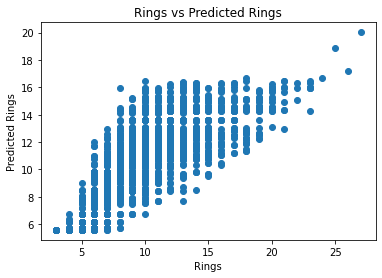

In [39]:
plt.scatter(Y_train,y_pred)
plt.xlabel("Rings")
plt.ylabel('Predicted Rings')
plt.title("Rings vs Predicted Rings")
plt.show()

In [41]:
y_test_pred=ada.predict(X_test)
acuracy=r2_score(Y_test,y_test_pred)
print(acuracy)

0.33242688102439777


In [42]:
import pickle
filename="abalone.pkl"
pickle.dump(lm,open(filename,"wb"))